#### Asigment 3

Student: Andres Urrego Angel

Course: Computational Applied Statistics


#### Two principal components
* First of all I read the file ziptrain to make few manipulation in order to create the projection
    * Filter on the digit column for 2 and 7
    * Visualize each filter dataset to confirm graphically the right choosen
    * Verify in a general plot the projection of two components

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path='/home/andrw/script/repository/McGill/data/'
filename = path+'ziptrain.csv'
numbers = np.loadtxt(filename)

number2=numbers[numbers[:, 0] == 2]
number7=numbers[numbers[:, 0] == 7]
numbers27 = np.vstack([number2 , number7])

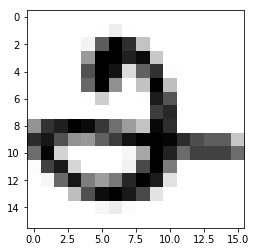

In [2]:
plt.imshow(-number2[2, 1:].reshape(16,16), "gray");

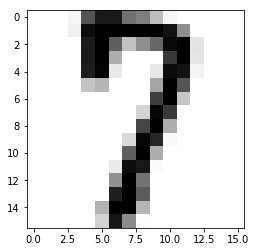

In [3]:
plt.imshow(-number7[3, 1:].reshape(16,16), "gray");

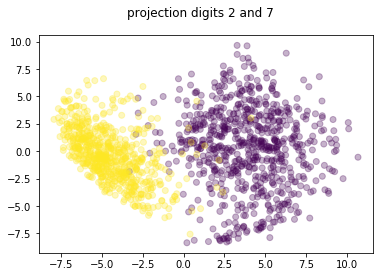

In [4]:
pca = PCA(n_components = 2)
pca.fit(numbers27[:, 1:])
Z = pca.transform(numbers27[:,1:])
plt.suptitle('projection digits 2 and 7')
plt.scatter(Z[:,0], Z[:,1], c= numbers27[:,0], alpha=0.3);


#### Logistic Regression

Once the dataset is projected in two principal components is easier to create a logistic regression model that might predicts the digit read by the two variables coming from the PCA model. In order to achieve and demostrate this accurate prediction is required:

* Creates a defined target **y** based on a binary logic assigning  0 when the result is 2 and 1 for 7.
* The predictors for the model are going to be the two components suipplied by the model PCA

In [31]:

#Catch the target 
target = []
for i in numbers27:
    binary = 0
    if (i[0] == float(2)):
        binay = 0
        #print(i[0], binary)
        target.append(binary)
    else:
        binary = 1
        #print(i[0], binary)
        target.append(binary)
    #print(type(i[0]),int(i[0]))

#Compose the dataframe 
columns = ['component1','component2']
df = pd.DataFrame(Z,columns=columns)
df['y'] = target
print(df.head(n=5))
df.describe()

from sklearn.linear_model import LogisticRegression

#Create linear model for prediction
lr = LogisticRegression()
lr.fit(X= df[['component1','component2']], y = df['y'])

   component1  component2  y
0    6.170833    1.125083  0
1   -3.317885   -1.851943  0
2    3.073119   -4.297044  0
3    4.008856    0.497935  0
4    6.956282   -5.635827  0


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Validate predictions

As validation purpose is required to deploy a confusion matrix based on the file **ziptest**. So mainly, the logistic regression model was built up with the projected components in **ziptrain** and should be able to match the expected output in a different dataset to predict accurate the read digit among 2 and 7. For this purpose is required:

* Load the file **ziptest** , then apply a filter to catch the digits 2 and 7
    * Is nessary deploy a PCA model as well as the previous step to project the 256 predictors in only two principal components that predict the suitable digit.
* Isolate the expected target from **ziptest** to be compared later in a confusion matrix
* Apply the confusion matrix on **y_true** coming from the isolated target versus **y_pred** from the linear regression model prediction output.

In [32]:
from sklearn.metrics import confusion_matrix

# Read and load the file
path='/home/andrw/script/repository/McGill/data/'
filename = path+'ziptest.csv'
numberstest = np.loadtxt(filename)

#Create arrays for projection
numbertest_2=numberstest[numberstest[:, 0] == 2]
numbertest_7=numberstest[numberstest[:, 0] == 7]
numberstest_27 = np.vstack([numbertest_2 , numbertest_7])

#Apply projection
pca_test = PCA(n_components = 2)
pca_test.fit(numberstest_27[:, 1:])
Z_test = pca_test.transform(numberstest_27[:,1:])

target_test = []
for i in numberstest_27:
    binary = 0
    if (i[0] == float(2)):
        binay = 0        
        target_test.append(binary)
    else:
        binary = 1        
        target_test.append(binary)


# Define two predictions for confusion matrix
y_true = pd.Series(target_test, name = 'Actual')
    #Apply prediction
predicted =lr.predict(Z_test.reshape(345,2))
y_pred = pd.Series(predicted, name = 'Predicted')
df_confusion = pd.crosstab(y_true,y_pred, rownames=['Actual'],colnames=['Predicted'],margins=True)
print(df_confusion)

Predicted    0    1  All
Actual                  
0          187   11  198
1           14  133  147
All        201  144  345


##### Multiple principal components
Now is time to test the logistic regression model in the entire projected dataset. It's required pick up just the positions that match with the digits aimed as target for our model.

* Create a projected principal components for the entire dataset **ztrain**
* Walk thru the dataset to identify the positions within m with the desired target 2 and 7
* Deploy the linear regresion model getting as input X the projected predictors from m for the target 

In [33]:
# the array numbers contains all the train data this was loaded in the previous exercise

pca_train = PCA(n_components = 2)
pca_train.fit(numbers[:, 1:])
m = pca_train.transform(numbers[:,1:])

# picking up an m that matchs with 2 and 7 be the most precise
positions_2 = []
positions_7 = []
counter = 0
for i in numbers:  
    counter += 1
    if (float(2) == i[0]): 
        #print(i[0],counter)
        pos = "{},{}".format(i[0],counter)
        positions_2.append(pos)
    elif (float(7) == i[0]) :
        #print(i[0],counter)
        pos = "{},{}".format(i[0],counter)
        positions_7.append(pos)

print('The m picked out for 2 is the position {}'.format(positions_2[0][4:]),'values in m: {}'.format(m[42]))
print('The m picked out for 7 is the position {}'.format(positions_7[6][4:]),'values in m: {}'.format(m[28]))

print('-'*20,'Execute predictions','-'*20)

print(lr.predict(m[42].reshape(1,2)))
print(lr.predict(m[28].reshape(1,2)))

The m picked out for 2 is the position 42 values in m: [-1.35507335  7.34474026]
The m picked out for 7 is the position 28 values in m: [-2.39930596  3.93702031]
-------------------- Execute predictions --------------------
[0]
[1]


##### Differenciate all digits

Now is read the complete dataset **ztrain** again without apply any distinction in the digit 2 or 7. Then is deployed a lineaar discriminant model to predict a target and using as predictors the variables coming from a projection of the entire **ztrain**. The steps followed were:

* Visualize a projection for all digits in a plot to garantee that were included all numbers.
* Create and deploy a linear discriminant model.
* Apply predictions.

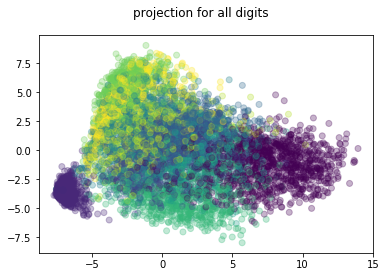

In [34]:
# I reuse m that was projected in two components for the previous task
plt.suptitle('projection for all digits')
plt.scatter(m[:,0], m[:,1], c= numbers[:,0], alpha=0.3);

#### Apply LInear Discriminant

Now is required apply a linear discriminant regression to the whole dataset. THe outcome is analized in a confusion matrix giving as result of the prediction 1 for the cases where the model match with the target and 0 when the model came up with the wrong answer

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Prepare X and Y for the model

target = []
for i in numbers:
    target.append(i[0])
    #print(i[0])
    
columns = ['component1','component2']
df = pd.DataFrame(data=m,columns=columns)
df['y'] = target


# Build up the linear model
lda = LinearDiscriminantAnalysis()
X = df[['component1', 'component2']]
y = df['y']
lda.fit(X,y)


#Validate with a confusion matrix
predicted = lda.predict(m.reshape(7291,2))
y_pred = pd.Series(predicted, name = 'Predicted')
y_true = pd.Series(target, name = 'Actual')
result_matrix = pd.crosstab(y_true,y_pred, rownames=['Actual'],colnames=['Predicted'],margins=True)
print(result_matrix)


Predicted   0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   All
Actual                                                             
0.0         961     1   42   37    0   68   85    0    0    0  1194
1.0           0  1003    0    0    0    0    2    0    0    0  1005
2.0          36    34  286  157   61   34   86    0   28    9   731
3.0          36     2  121  333   62   48    5   12   29   10   658
4.0           2    58   57   69  204    7   10  102   14  129   652
5.0         114     3  135   99   11   82  100    2    8    2   556
6.0          90    41   53    4    3   24  448    0    1    0   664
7.0           0     2    6   14   68    0    0  425    0  130   645
8.0          14    28  107  120  188    7    3   13   36   26   542
9.0           0    18    1   33  132    1    0  271    1  187   644
All        1253  1190  808  866  729  271  739  825  117  493  7291


Prediction maximized over the "m" specificly that satisfies an upper prediction over **ziptest**

In [50]:
print("the number predicted is {} with the projected principal components values {}".format(
    lda.predict(m[42].reshape(1,2)),m[42]))
print("the number predicted is {} with the projected principal components values {}".format(
    lda.predict(m[28].reshape(1,2)),m[28]))

the number predicted is [ 7.] with the projected principal components values [-1.35507335  7.34474026]
the number predicted is [ 9.] with the projected principal components values [-2.39930596  3.93702031]
